#**Senior Project**

#step1: Loading our dataset



#Loading data




#*   This dataset is the "Car_donation data" start around 1980 to 2023.....

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip freeze > requirements.txt

In [3]:
#Importing the require library
import os
import numpy as np
import pandas as pd
import os
import numpy as np
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,LassoCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from scipy.stats import boxcox
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error


In [4]:
# step 1: getting the datasets
#from google.colab import files
#uploaded=files.upload()

# then we are using pandas to read the csv
#import pandas as pd
car_donation=pd.read_csv('/content/drive/MyDrive/datas/_Car_Donation_Version7 - Raw Detail (1).csv')
# we are checking the head of the car donation, checking the first 10 rows
car_donation.head(10)

,operation,id,status,Sold_Year,Sold_month,Sold_Yearmonth,Donation_date,time,name,car_year,...,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,kbb,dmvMarketValue,useTax,buyItNowPrice,specialPrice,data_refresh_time
0,SF,1.0,11.0,2021.0,1.0,2021-01,2020/08/07,NaN,Chung Pei Chen,2011.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
1,SF,2.0,11.0,2020.0,11.0,2020-11,2020/10/31,4:00 PM,CHENH CARSON,2003.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
2,SF,3.0,11.0,2020.0,11.0,2020-11,2020/10/31,3:00 PM,Fuchun Wang,2001.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
3,SF,4.0,11.0,2020.0,11.0,2020-11,2020/11/01,11:30 PM,CHEN LEI,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
4,SF,5.0,11.0,2020.0,11.0,2020-11,2020/11/01,4:00 PM,MINGLANG HU,1999.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
5,SF,6.0,11.0,2020.0,11.0,2020-11,2020/11/01,1:30 PM,LI CHUAN,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
6,SF,7.0,11.0,2020.0,12.0,2020-12,2020/11/02,NaN,Shing Hing Inc,1998.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
7,SF,8.0,11.0,2020.0,11.0,2020-11,2020/11/03,11:00 PM,Fan Yong Fa,2006.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
8,SF,9.0,11.0,2020.0,11.0,2020-11,2020/11/04,2~3pm,Sim Hubert Y,2004.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56
9,SF,10.0,11.0,2020.0,11.0,2020-11,2020/11/03,1:30 PM,Hing Yungwi,2013.0,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2022-09-01 20:46:56


Check Data at first sight

In [5]:
# then we wish to have a detail summary of the datasets
car_donation.describe()

,id,status,Sold_Year,Sold_month,car_year,cost,Direct cost,cost type,Cost subtype,complain,plateNew,categoryColor,mechanicalIssues,retailWholesaleJunk,newPlateFromDealer,vinAudit,dmvMarketValue,buyItNowPrice,specialPrice
count,1196.000000,1196.000000,1098.000000,1098.000000,1188.000000,121.000000,0.0,0.0,0.0,0.0,0.0,1196.000000,0.0,1196.000000,1196.0,0.0,4.00000,0.0,0.0
mean,541.401338,10.366221,2021.234062,6.310565,2001.547138,58.495868,NaN,NaN,NaN,NaN,NaN,0.047659,NaN,0.015886,0.0,NaN,2400.00000,NaN,NaN
std,329.939768,2.244024,0.604485,3.494637,5.052576,93.473002,NaN,NaN,NaN,NaN,NaN,0.368513,NaN,0.125088,0.0,NaN,864.09876,NaN,NaN
min,1.000000,1.000000,2018.000000,1.000000,1976.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1600.00000,NaN,NaN
25%,264.750000,11.000000,2021.000000,3.000000,1999.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,1900.00000,NaN,NaN
50%,521.500000,11.000000,2021.000000,6.000000,2002.000000,35.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2200.00000,NaN,NaN
75%,824.250000,11.000000,2022.000000,9.000000,2005.000000,80.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2700.00000,NaN,NaN
max,1123.000000,12.000000,2022.000000,12.000000,2016.000000,710.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1.000000,0.0,NaN,3600.00000,NaN,NaN


In [6]:
# the columns's dtypes
car_donation.dtypes

operation             object
id                   float64
status               float64
Sold_Year            float64
Sold_month           float64
                      ...   
dmvMarketValue       float64
useTax                object
buyItNowPrice        float64
specialPrice         float64
data_refresh_time     object
Length: 72, dtype: object

In [7]:
car_donation['price']=car_donation['price'].str.replace(',','')
car_donation.price=car_donation.price.astype(float)
car_donation['mileage']=car_donation['mileage'].str.replace(',','')
car_donation['mileage'] = pd.to_numeric(car_donation['mileage'],errors='coerce')

# Main Focus:  Is there a chance that different people who repair the car tend to have a different price for selling that car?

In [8]:
car_donation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operation            1196 non-null   object 
 1   id                   1196 non-null   float64
 2   status               1196 non-null   float64
 3   Sold_Year            1098 non-null   float64
 4   Sold_month           1098 non-null   float64
 5   Sold_Yearmonth       1098 non-null   object 
 6   Donation_date        1191 non-null   object 
 7   time                 1093 non-null   object 
 8   name                 1170 non-null   object 
 9   car_year             1188 non-null   float64
 10  make                 1187 non-null   object 
 11  model                1173 non-null   object 
 12  mileage              1100 non-null   float64
 13  plate                1152 non-null   object 
 14  vin                  1169 non-null   object 
 15  phone                1184 non-null   o

# Fit an simple cluster  model

In [9]:
!pip install statsmodels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


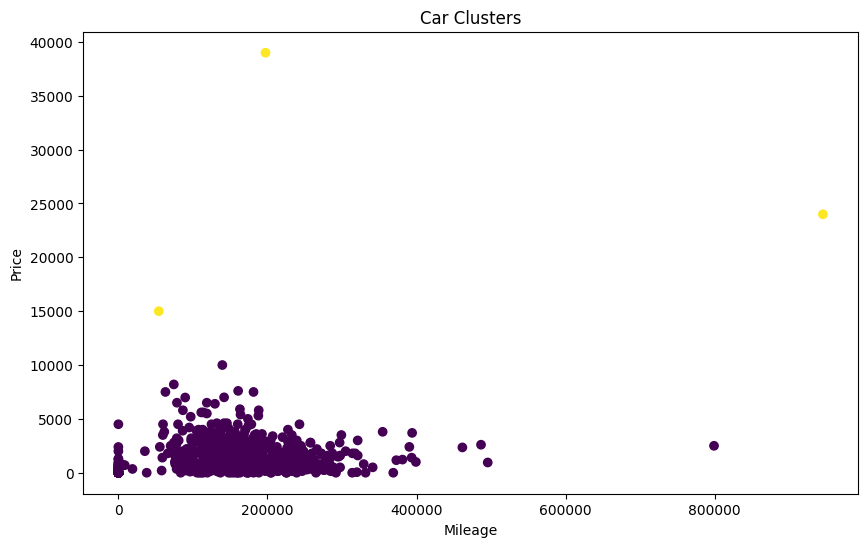

In [10]:
# import the require library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We are Selecting the relevant columns
columns_to_cluster = ['Sold_Year', 'Sold_month', 'car_year', 'mileage', 'price']
# We are only using a subset of the data for simplicity
subset_data = car_donation[columns_to_cluster].fillna(0).sample(n=1000, random_state=42)
# We are Extracting the price column for clustering
X = subset_data[['price']]
# We are Applying the k-means clustering with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(X)

# We are ready to Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['mileage'], subset_data['price'], c=subset_data['cluster'], cmap='viridis')
plt.title('Car Clusters')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# not very helpful, need to create an binary classifiers

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


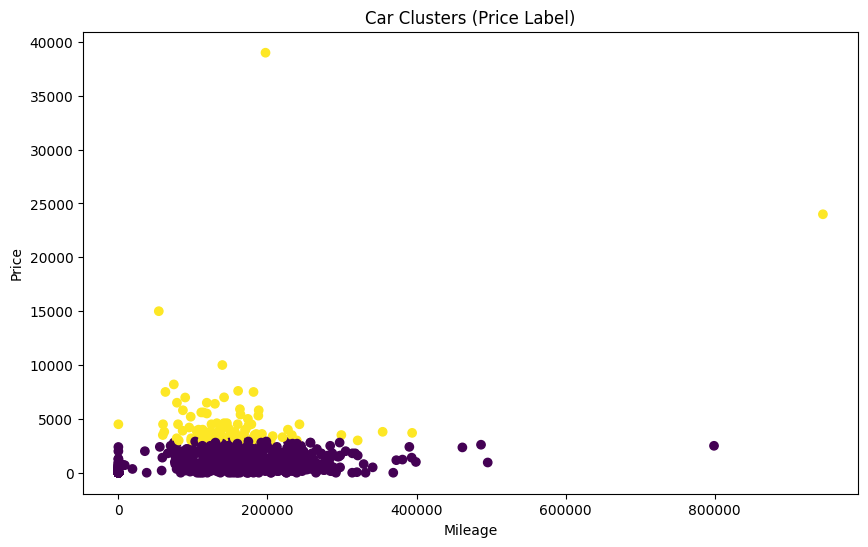

In [11]:
# import the require library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We are Selecting the relevant columns
columns_to_cluster = ['Sold_Year', 'Sold_month', 'car_year', 'mileage', 'price']
# We are only using a subset of the data for simplicity
subset_data = car_donation[columns_to_cluster].fillna(0).sample(n=1000, random_state=42)
# We are Extracting the price column for clustering
X = subset_data[['price']]
# We are Applying the k-means clustering with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(X)

# We need to Assign labels based on the price threshold
subset_data['price_label'] = (subset_data['price']>= 3000).astype(int)
# We are ready to Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['mileage'], subset_data['price'], c=subset_data['price_label'], cmap='viridis')
plt.title('Car Clusters (Price Label)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# We wish to trying different price threshold and evalualte the cluster performance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Figure size 1500x2400 with 0 Axes>

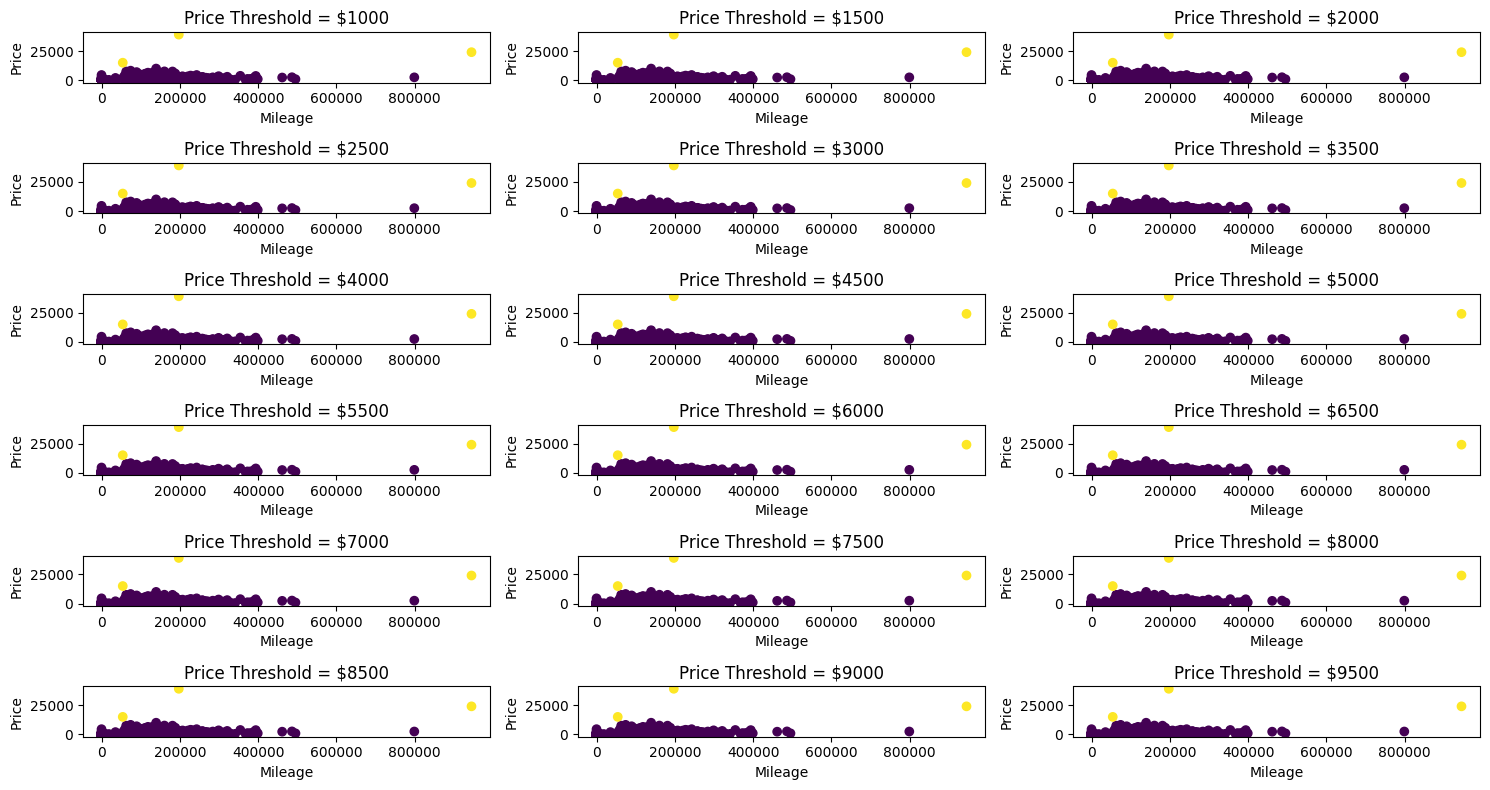

In [12]:
# import the require library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We are Selecting the relevant columns
columns_to_cluster = ['Sold_Year', 'Sold_month', 'car_year', 'mileage', 'price']
# We are only using a subset of the data for simplicity
subset_data = car_donation[columns_to_cluster].fillna(0).sample(n=1000, random_state=42)
# We are Extracting the price column for clustering
X = subset_data[['price']]

# We are Trying different price thresholds and evaluating cluster performances
thresholds = range(1000, 10000, 500)
cluster_assignments = {}

num_thresholds = len(thresholds)
num_rows = (num_thresholds + 2) // 3

plt.figure(figsize=(15, 4* num_rows))


# We are Visualizing the clusters for different threshold
plt.figure(figsize=(15, 8))
for i, threshold in enumerate(thresholds):
  plt.subplot(num_rows, 3, i+1)
  kmeans = KMeans(n_clusters=2, random_state=42)
  subset_data['price_label'] = (subset_data['price'] >= threshold).astype(int)
  subset_data['cluster'] = kmeans.fit_predict(X)
  cluster_assignments[threshold] = subset_data['cluster'].tolist()
  plt.scatter(subset_data['mileage'], subset_data['price'],c=cluster_assignments[threshold], cmap='viridis')
  plt.title(f'Price Threshold = ${threshold}')
  plt.xlabel('Mileage')
  plt.ylabel('Price')

plt.tight_layout()
plt.show()

# Determining the best threshold for price involves evaluating the resulting clusters for each threshold and selecting the one that provides the most meaningful or interpretable separation of data points. Here are steps to help you determine the best threshold:

Visual Inspection: Examine the plots generated by the code to visually inspect the separation of clusters for each threshold. Look for clear boundaries and meaningful distinctions between the two clusters.

Cluster Stability: Evaluate the stability of the clusters across different thresholds. If small changes in the threshold result in significant changes in cluster assignments, it might indicate that the data is not naturally separable into distinct clusters.

Domain Knowledge: Consider any domain-specific knowledge you have about the data or the problem you're trying to solve. The best threshold is often one that aligns with the inherent characteristics of the data and makes sense in the context of your analysis.

Quantitative Evaluation: If you have a specific metric or criterion for evaluating the quality of clusters, you can use it to quantitatively assess the performance of each threshold. For example, you might use silhouette score, Davies-Bouldin index, or other clustering evaluation metrics.

Here's an example of how you might calculate and display silhouette scores for each threshold:

# We are Comparing the silhouette scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

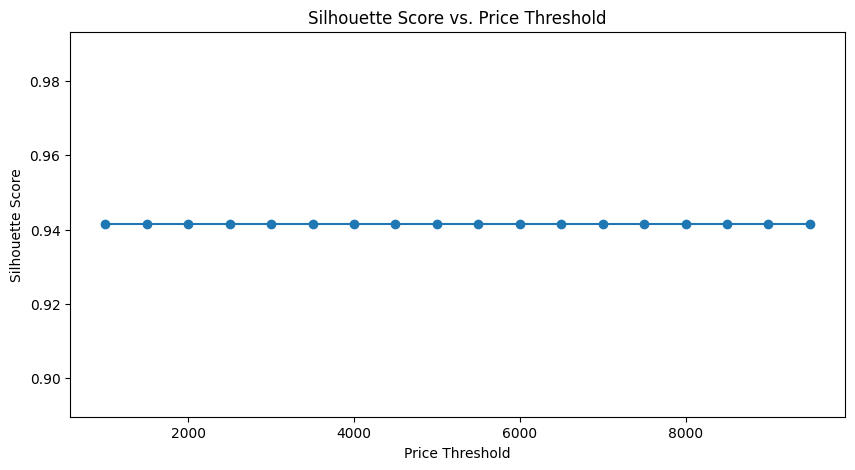

In [13]:
# Import the require library
from sklearn.metrics import silhouette_score

silhouette_scores = []
for threshold in thresholds:
  kmeans= KMeans(n_clusters=2, random_state=42)
  subset_data['price_label'] = (subset_data['price'] >= threshold).astype(int)
  subset_data['cluster'] = kmeans.fit_predict(X)
  silhouette_scores.append(silhouette_score(X, subset_data['cluster']))


# We are Visualize silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(thresholds, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Price Threshold')
plt.xlabel('Price Threshold')
plt.ylabel('Silhouette Score')
plt.show()

# We are creating boundary to separate them

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


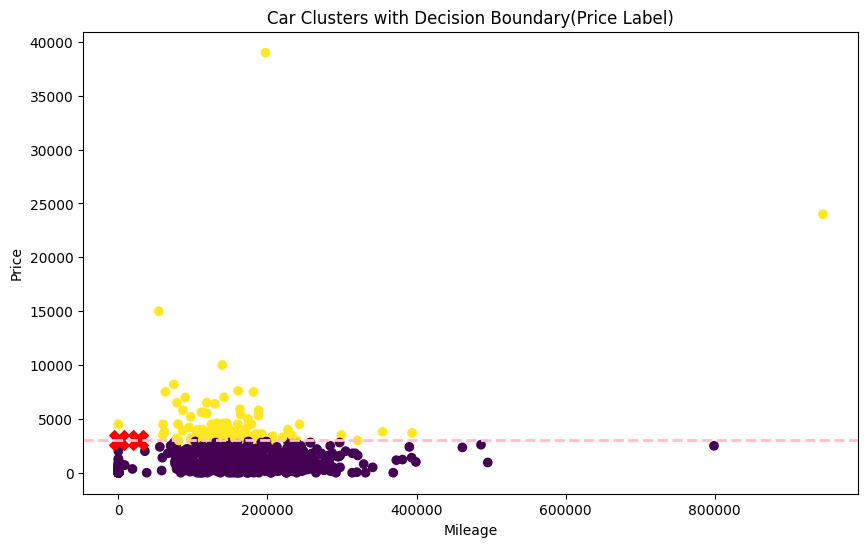

In [14]:
# import the require library
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# We are Selecting the relevant columns
columns_to_cluster = ['Sold_Year', 'Sold_month', 'car_year', 'mileage', 'price']
# We are only using a subset of the data for simplicity
subset_data = car_donation[columns_to_cluster].fillna(0).sample(n=1000, random_state=42)
# We are Extracting the price column for clustering
X = subset_data[['price']]
# We are Applying the k-means clustering with 2 cluster
kmeans = KMeans(n_clusters=2, random_state=42)
subset_data['cluster'] = kmeans.fit_predict(X)

# We need to Assign labels based on the price threshold
subset_data['price_label'] = (subset_data['price']>= 3000).astype(int)
# We are getting the cluster centroids
centroids = kmeans.cluster_centers_
# We are Visualize the clusters and decision boundary
# We are ready to Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(subset_data['mileage'], subset_data['price'], c=subset_data['price_label'], cmap='viridis')
plt.scatter(centroids[:, 0], [3000, 3000], c='red', marker='X', s=200)
plt.axhline(y=3000, color='pink', linestyle='--', linewidth=2)
plt.title('Car Clusters with Decision Boundary(Price Label)')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# We are creating an separate plot for the two category of clusters

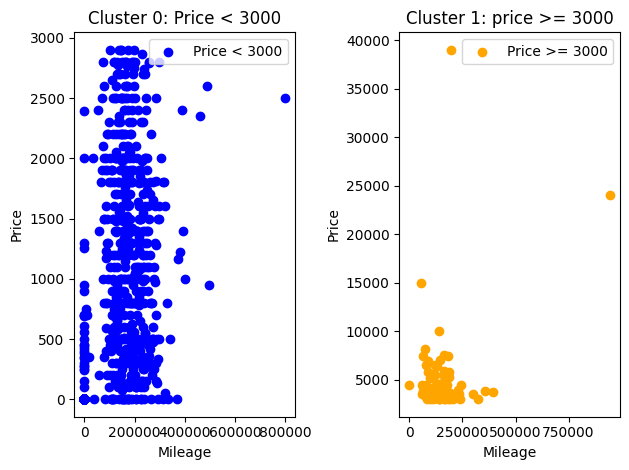

In [15]:
# We are Creating Scatter plot for cluster 0
plt.subplot(1, 2, 1)
plt.scatter(subset_data.loc[subset_data['price_label']==0, 'mileage'], subset_data.loc[subset_data['price_label']==0, 'price'], c='blue', label='Price < 3000')
plt.title('Cluster 0: Price < 3000')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
# Next, we are doing Scatter plot for cluster 1
plt.subplot(1, 2, 2)
plt.scatter(subset_data.loc[subset_data['price_label']==1, 'mileage'], subset_data.loc[subset_data['price_label']==1, 'price'], c='orange', label='Price >= 3000')
plt.title('Cluster 1: price >= 3000')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

# We are ready to create an separte model for each of the cluster

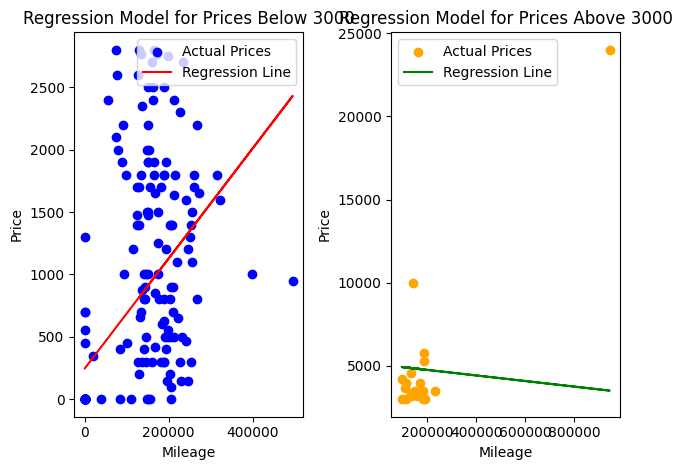

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'subset_data' with columns 'mileage', 'price', and 'price_label'

# Separate data into two groups based on 'price_label'
group_below_3000 = subset_data[subset_data['price_label'] == 0]
group_above_3000 = subset_data[subset_data['price_label'] == 1]

# Features (X) and target variable (y) for group_below_3000
X_below_3000 = group_below_3000[['mileage']]
y_below_3000 = group_below_3000['price']

# Features (X) and target variable (y) for group_above_3000
X_above_3000 = group_above_3000[['mileage']]
y_above_3000 = group_above_3000['price']

# Splitting the data into training and testing sets for group_below_3000
X_train_below_3000, X_test_below_3000, y_train_below_3000, y_test_below_3000 = train_test_split(
    X_below_3000, y_below_3000, test_size=0.2, random_state=42
)

# Splitting the data into training and testing sets for group_above_3000
X_train_above_3000, X_test_above_3000, y_train_above_3000, y_test_above_3000 = train_test_split(
    X_above_3000, y_above_3000, test_size=0.2, random_state=42
)

# Creating linear regression models for both groups
model_below_3000 = LinearRegression()
model_above_3000 = LinearRegression()

# Fitting the models on the training sets
model_below_3000.fit(X_train_below_3000, y_train_below_3000)
model_above_3000.fit(X_train_above_3000, y_train_above_3000)

# Making predictions on the testing sets
y_pred_below_3000 = model_below_3000.predict(X_test_below_3000)
y_pred_above_3000 = model_above_3000.predict(X_test_above_3000)

# Evaluate the models using Mean Squared Error (MSE)
mse_below_3000 = mean_squared_error(y_test_below_3000, y_pred_below_3000)
mse_above_3000 = mean_squared_error(y_test_above_3000, y_pred_above_3000)



# Plotting the regression lines for both groups
plt.subplot(1, 2, 1)
plt.scatter(X_test_below_3000, y_test_below_3000, c='blue', label='Actual Prices')
plt.plot(X_test_below_3000, y_pred_below_3000, c='red', label='Regression Line')
plt.title('Regression Model for Prices Below 3000')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_above_3000, y_test_above_3000, c='orange', label='Actual Prices')
plt.plot(X_test_above_3000, y_pred_above_3000, c='green', label='Regression Line')
plt.title('Regression Model for Prices Above 3000')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Assuming you have a DataFrame named 'subset_data' with columns 'mileage', 'price', and 'price_label'

# Separate data into two groups based on 'price_label'
group_below_3000 = subset_data[subset_data['price_label'] == 0]
group_above_3000 = subset_data[subset_data['price_label'] == 1]

# Features (X) and target variable (y) for group_below_3000
X_below_3000 = group_below_3000[['mileage']]
y_below_3000 = group_below_3000['price']

# Features (X) and target variable (y) for group_above_3000
X_above_3000 = group_above_3000[['mileage']]
y_above_3000 = group_above_3000['price']

# Splitting the data into training and testing sets for group_below_3000
X_train_below_3000, X_test_below_3000, y_train_below_3000, y_test_below_3000 = train_test_split(
    X_below_3000, y_below_3000, test_size=0.2, random_state=42
)

# Splitting the data into training and testing sets for group_above_3000
X_train_above_3000, X_test_above_3000, y_train_above_3000, y_test_above_3000 = train_test_split(
    X_above_3000, y_above_3000, test_size=0.2, random_state=42
)

# Creating linear regression models for both groups
model_below_3000 = LinearRegression()
model_above_3000 = LinearRegression()

# Fitting the models on the training sets
model_below_3000.fit(X_train_below_3000, y_train_below_3000)
model_above_3000.fit(X_train_above_3000, y_train_above_3000)

# Making predictions on the testing sets
y_pred_below_3000 = model_below_3000.predict(X_test_below_3000)
y_pred_above_3000 = model_above_3000.predict(X_test_above_3000)

# Evaluate the models using Mean Squared Error (MSE)
mse_below_3000 = mean_squared_error(y_test_below_3000, y_pred_below_3000)
mse_above_3000 = mean_squared_error(y_test_above_3000, y_pred_above_3000)

print(f'Mean Squared Error for Group Below 3000: {mse_below_3000}')
print(f'Mean Squared Error for Group Above 3000: {mse_above_3000}')

# Adding a constant term for the statsmodels summary
X_train_below_3000 = sm.add_constant(X_train_below_3000)
X_train_above_3000 = sm.add_constant(X_train_above_3000)

# Creating statsmodels OLS models for both groups
model_below_3000_stats = sm.OLS(y_train_below_3000, X_train_below_3000).fit()
model_above_3000_stats = sm.OLS(y_train_above_3000, X_train_above_3000).fit()

# Printing summary tables
print("\nSummary for Group Below 3000:")
print(model_below_3000_stats.summary())

print("\nSummary for Group Above 3000:")
print(model_above_3000_stats.summary())

Mean Squared Error for Group Below 3000: 602979.978342515
Mean Squared Error for Group Above 3000: 25113138.282202803

Summary for Group Below 3000:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     300.6
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.46e-56
Time:                        21:50:12   Log-Likelihood:                -5791.8
No. Observations:                 724   AIC:                         1.159e+04
Df Residuals:                     722   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [